In [190]:
import copy

import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import torch
# import seaborn as sns

from gglm.glm.mmdglm import MMDGLM
# from gglm.cnncritic import MMDCritic
from sptr.sptr import SpikeTrain
from gglm.utils import shift_array
from kernel.fun import KernelFun
from kernel.rect import KernelRect

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
path = '/home/diego/Dropbox/projects/generative-glm/Huk2010/p110509b_FIRA.mat'
mat = scipy.io.loadmat(path)

In [147]:
# type(mat['FIRA'][0][0][0][0])
# mat['FIRA'][0][0][0][0]
# mat['FIRA'][0][2]

In [153]:
len(b)

1362

IndexError: index 11 is out of bounds for axis 1 with size 6

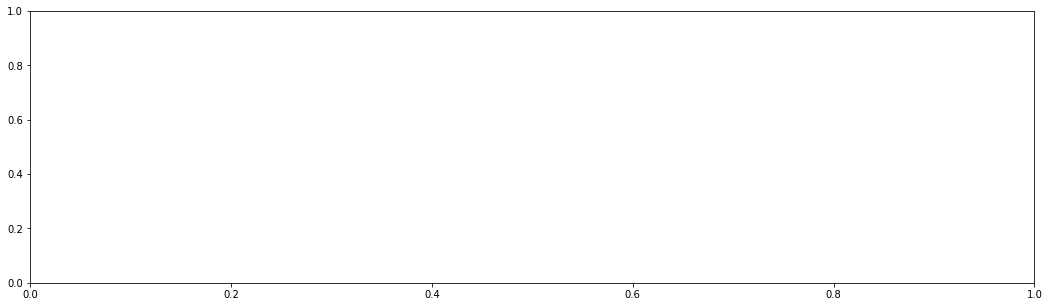

In [154]:
b = mat['FIRA'][0][2]#['task']
# a = mat['FIRA'][0][0]#['task']

fig, ax = plt.subplots(figsize=(18, 5))
ax.plot(b[:, 11])

In [161]:
mat['FIRA'][0][2][-3][0][0][0]

array([[1229],
       [1596],
       [1768],
       [1911],
       [1953],
       [2052],
       [2124],
       [2510],
       [3663],
       [3703]], dtype=uint16)

In [188]:
mask = np.zeros((10000, 1362), dtype=bool)
for ii in range(len(mat['FIRA'][0][2])):
    aux = mat['FIRA'][0][2][ii][0][0][0]
    if len(aux) > 1:
        aux = np.array(aux[:, 0])
        mask[aux, ii] = True
#         try:
#             l.append(np.max(aux))
#         except:
#             print(aux, len(aux))

# [np.max(mat['FIRA'][0][2][ii][0][0][0]) for ii in range(len(mat['FIRA'][0][2])) if len(mat['FIRA'][0][2][ii]) > 0]

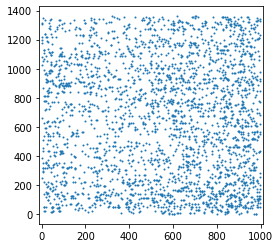

In [201]:
st = SpikeTrain(np.arange(mask.shape[0]), mask)
st = SpikeTrain(np.arange(1000), mask[:1000])
fig, ax = plt.subplots(figsize=(4, 4))
st.plot(ax=ax, ms=1)